# Tutorial de análise qualitativa e diagrama de bifurcação

*Este tutorial pressupõe que você leu o [tutorial sobre integração numérica](https://colab.research.google.com/github/piklprado/ode_examples/blob/master/Integracao%20numerica.ipynb).*

## Explorando o espaço de parâmetros: diagramas de bifurcação

Diagramas de bifurcação representam as soluções (de longo prazo) de um modelo em função de alguma variável chave. A ideia é que, à medida que esse parâmetro muda, as soluções mudam de forma "bem comportada", e isso nos ajuda a entender melhor o comportamento geral do modelo.

Neste tutorial, vamos estudar um modelo simples de predador-presa (modelo Rosenzweig-MacArthur), e ver como a quantidade de recursos por presa ($K$) muda a dinâmica.

### O modelo de recursos do consumidor Rosenzweig-MacArthur

Este modelo é expresso como:
$$ \begin{aligned}
\frac{dR}{dt} &= rR \left( 1 - \frac{R}{K} \right) - \frac{a R C}{1+ahR} \\
\frac{dC}{dt} &= \frac{e a R C}{1+ahR} - d C
\end{aligned} $$

#### Soluções do modelo Rosenzweig–MacArthur

Usamos o mesmo método de antes para integrar este modelo numericamente:

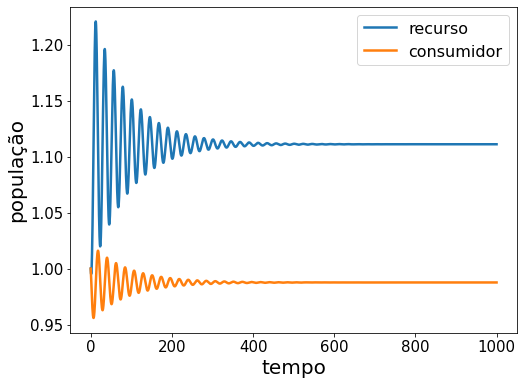

In [1]:
%matplotlib inline
from numpy import *
from scipy.integrate import odeint
from matplotlib.pyplot import *
ion()

def RM(y, t, r, K, a, h, e, d):
    return array([ y[0] * ( r*(1-y[0]/K) - a*y[1]/(1+a*h*y[0]) ),
                   y[1] * (e*a*y[0]/(1+a*h*y[0]) - d) ])

t = arange(0, 1000, .1)
y0 = [1, 1.]
pars =  (1., 10., 1., 0.1, 0.1, 0.1)

y = odeint(RM, y0, t, pars)

figure(figsize=(8, 6)) 
plot(t, y, linewidth=2.5)
tick_params(labelsize= 15)
xlabel('tempo',fontsize=20)
ylabel('população',fontsize=20)
legend(['recurso', 'consumidor'],fontsize=16)


Para os parâmetros escolhidos acima, a solução de longo prazo (assintótica) é um ponto fixo. Vamos ver isso no espaço de fase, ou seja, o espaço de Predadores ($P$) vs. Presas ($V$). Notamos que as setas estão "circulando", mas sempre apontam para dentro, e assim a trajetória se move em direção ao meio, ao ponto fixo.

Text(0, 0.5, 'Consumidor')

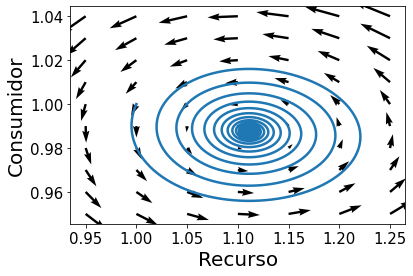

In [2]:
# plote a solução no espaço de fase
plot(y[:,0], y[:,1],linewidth=2.5)
tick_params(labelsize= 15)
# definindo uma grade de pontos
R, C = meshgrid(arange(0.95, 1.25, .05), arange(0.95, 1.04, 0.01))
# calcula o valor da derivada no ponto na grade
dy = RM(array([R, C]), 0, *pars)
# traçamos as setas nos pontos da grade, com a diferença
# e comprimento determinado pela derivada dy
# Esta é uma imagem do fluxo da solução no espaço de fase
quiver(R, C, dy[0,:], dy[1,:], scale_units='xy', angles='xy')
xlabel('Recurso',fontsize=20)
ylabel('Consumidor',fontsize=20)

#### Brincando um pouco com os parâmetros...

Aumentando a capacidade de carga $K$ de $10$ para $15$, agora vemos oscilações...

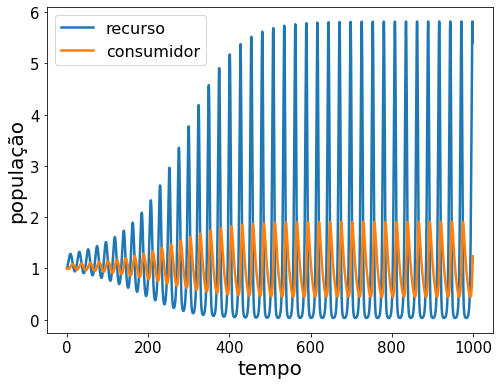

In [3]:
# now K = 15
t = arange(0, 1000, .1)
pars =  (1., 15., 1., 0.1, 0.1, 0.1)
y_osc = odeint(RM, y0, t, pars)

figure(figsize=(8, 6)) 
plot(t, y_osc, linewidth=2.5)
tick_params(labelsize= 15)
xlabel('tempo',fontsize=20)
ylabel('população',fontsize=20)
legend(['recurso', 'consumidor'],fontsize=16)

Olhando novamente para o gráfico de espaço de fase, vemos agora que o fluxo (as setas) de dentro apontam para fora, em direção a um ciclo limite, e as setas de fora apontam para dentro. O ciclo limite corresponde à solução periódica que acabamos de ver.

Text(0, 0.5, 'Consumidor')

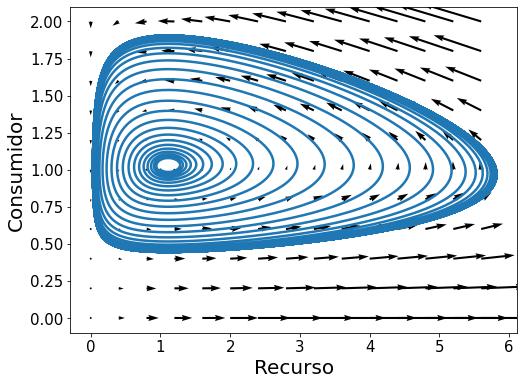

In [4]:
figure(figsize=(8, 6)) 
tick_params(labelsize= 15)
plot(y_osc[:,0], y_osc[:,1],linewidth=2.5)
R, C = meshgrid(arange(0, 6., .4), arange(0, 2.1, 0.2))
dy = RM(array([R, C]), 0, *pars)
quiver(R, C, dy[0,:], dy[1,:], scale_units='xy', angles='xy')
xlabel('Recurso',fontsize=20)
ylabel('Consumidor',fontsize=20)

### O diagrama de bifurcação

Vimos as soluções para dois valores de $K$, $10$ e $15$, então queremos plotá-los como uma função de $K$. No segundo caso, há oscilações, então ao invés de pegar toda a solução, escolhemos apenas o mínimo e o máximo da solução (depois de muito tempo). Quando a solução é um ponto fixo, o mínimo e o máximo devem coincidir.

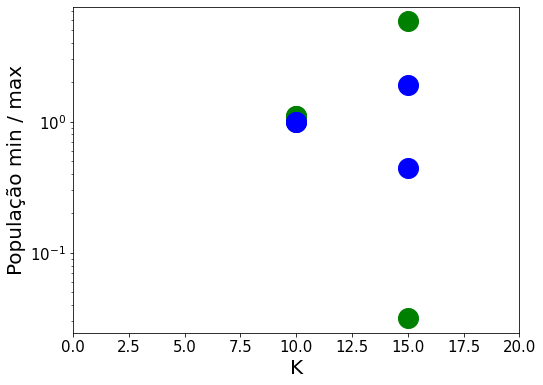

In [5]:
figure(figsize=(8, 6)) 
plot(10., y[-500:,0].min(), 'og',markersize=20)
plot(10., y[-500:,0].max(), 'og',markersize=20)
plot(10., y[-500:,1].min(), 'ob',markersize=20)
plot(10., y[-500:,1].max(), 'ob',markersize=20)
plot(15., y_osc[-500:,0].min(), 'og',markersize=20)
plot(15., y_osc[-500:,0].max(), 'og',markersize=20)
plot(15., y_osc[-500:,1].min(), 'ob',markersize=20)
plot(15., y_osc[-500:,1].max(), 'ob',markersize=20)
xlim((0, 20))
yscale('log')
tick_params(labelsize= 15)
xlabel('K',fontsize=20)
ylabel('População min / max',fontsize=20)
show()

Este diagrama de bifurcação ainda está bastante incompleto: ​​tem apenas dois pontos em $K$! Vamos tentar com muitos valores de $K$.

O que acontece quando alteramos a capacidade de carga $K$ de valores muito pequenos para valores muito grandes? Para valores muito pequenos, o recurso não vai sustentar a população consumidora, mas para valores maiores ok $K$, ambas as espécies devem ser beneficiadas... certo?

In [ ]:
## este bloco calcula soluções para muitos K's, devemos criar listas 
#  vazia para  que possamos anexar os valores posteriormente
ymin = []
ymax = []
KK = arange(.5, 25, .5)
t = arange(0, 6000, 1.)
# loop sobre os valores de K (KK)
for K in KK:
    #redefine os parâmetros usando o novo K
    pars =  (1., K, 1., 0.1, 0.1, 0.1)
    #integre novamente a equação, com novos parâmetros
    y = odeint(RM, y0, t, pars)
    # calcula o mínimo e o máximo das populações, mas
    # apenas para os últimos 1000 passos (a solução a longo prazo),
    # anexando o resultado à lista
    # pergunta: 1000 é suficiente? Quando não seria?
    ymin.append(y[-1000:,:].min(axis=0))
    ymax.append(y[-1000:,:].max(axis=0))
# converte as listas em arrays
ymin = array(ymin)
ymax = array(ymax)

In [ ]:
figure(figsize=(8, 6)) 
tick_params(labelsize= 15)
# E agora, plotamos os diagrâmas de bifurcação
plot(KK, ymin[:,0], 'g', label='recurso',linewidth=3.5)
plot(KK, ymin[:,1], 'b', label='consumidor',linewidth=3.5)
plot(KK, ymax[:,0], 'g',linewidth=3.5)
plot(KK, ymax[:,1], 'b',linewidth=3.5)
xlabel('$K$',fontsize=20)
ylabel('Populações min/max',fontsize=20)
legend(loc='best')
# Usamos a escala log no eixo x
yscale('log')
ylabel('população',fontsize=20)
legend(['recurso', 'consumidor'],fontsize=16)

Bem, a primeira previsão foi OK (observe que o gráfico acima usa uma escala logarítmica), mas para $K$ altos, os mínimos da oscilação vão para valores muito baixos, então as populações têm alto risco de extinção. Esse fenômeno é o chamado **paradoxo do enriquecimento**.

### Dinâmica dos recursos do consumidor em um ambiente sazonal

Um tipo especial de diagrama de bifurcação pode ser usado quando temos parâmetros que oscilam com o tempo, e queremos ver como isso interage com o sistema. Vamos considerar novamente as equações de Rosenzweig-MacArthur, mas agora fazemos $r$, a taxa de crescimento da presa, oscilar senoidalmente no tempo:

$$ \begin{aligned}
\frac{dR}{dt} &= r(t) R \left( 1 - \frac{R}{K} \right) - \frac{a R C}{1+ahR} \\
\frac{dC}{dt} &= \frac{e a R C}{1+ahR} - d C \\
r(t) &= r_0 (1+\alpha \sin(2\pi t/T))
\end{aligned} $$

Integramos de forma usual:

In [ ]:
figure(figsize=(8, 6)) 
tick_params(labelsize= 15)

def RM_season(y, t, r, alpha, T, K, a, h, e, d):
    # nesta função, o 't' aparece explicitamente
    return array([ y[0] * ( r * (1+alpha*sin(2*pi*t/T)) *
                           (1-y[0]/K) - a*y[1]/(1+a*h*y[0]) ),
    y[1] * (e*a*y[0]/(1+a*h*y[0]) - d) ])

t = arange(0, 2000, 1.)
y0 = [1., 1.]
pars =  (1., 0.1, 80., 10., 1., 0.1, 0.1, 0.1)
y = odeint(RM_season, y0, t, pars)
plot(t, y,linewidth=2.5)
xlabel('tempo',fontsize=20)
ylabel('população',fontsize=20)
legend(['recurso', 'consumidor'],fontsize=20)

Observe que, mesmo com $K$ pequeno, as soluções oscilam devido à oscilação de $r(t)$.

Agora usamos uma ferramenta que é a favorita de todos os tempos dos físicos: o diagrama de ressonância. Funciona exatamente como um diagrama de bifurcação, mas o parâmetro que é alterado é o período (ou frequência) da oscilação externa.

In [ ]:
ymin = []
ymax = []
t = arange(0, 6000, 1.) # tempos
TT = arange(1, 80, 2) # períodos
for T in TT:
    pars =  (1., 0.1, T, 10., 1., 0.1, 0.1, 0.1)
    y = odeint(RM_season, y0, t, pars)
    ymin.append(y[-1000:,:].min(axis=0))
    ymax.append(y[-1000:,:].max(axis=0))
ymin = array(ymin)
ymax = array(ymax)

In [ ]:
figure(figsize=(8, 6)) 
tick_params(labelsize= 15)
plot(TT, ymin[:,0], 'g', label='recurso',lw=3.5)
plot(TT, ymin[:,1], 'b', label='consumidor',lw=3.5)
plot(TT, ymax[:,0], 'g',lw=3.5)
plot(TT, ymax[:,1], 'b',lw=3.5)
legend(loc='best')
yscale('log')
xlabel('$T$',fontsize=20)
ylabel('Populações min/max',fontsize=20)
legend(['recurso', 'consumidor'],fontsize=20)

Vemos um pico forte! (lembre-se que esta é uma escala logarítmica). A frequência em que esse pico ocorre é a **frequência de ressonância** do sistema, e está relacionada com a frequência natural do sistema (que existe mesmo quando vai para um ponto fixo com parâmetros constantes!). A oscilação externa excita a frequência natural e aciona ciclos de grande amplitude, como quando empurramos uma gangorra (ou gangorra, o balancín).

## E se eu realmente quiser explorar um espaço de parâmetros de 10 dimensões?

Primeiro: boa sorte. Em segundo lugar, você provavelmente terá que amostrar o espaço, em vez de passar por tudo. O método recomendado para fazer isso é usar as chamadas [Latin Hypercube samples](http://en.wikipedia.org/wiki/Latin_hypercube_sampling), que usa uma amostragem aleatória enquanto garante uma distribuição espaçada aproximadamente regularmente. Observe, no entanto, que esse método é uma maneira de amostrar o espaço de parâmetros e fazer estatísticas úteis com ele, portanto, o resultado só fará sentido se você souber interpretar adequadamente os resultados. Dito isso, existem implementações para R e python:

* [R-Cran pse: Parameter space exploration](http://cran.r-project.org/web/packages/pse/)
* [PyDOE: design of experiments for Python](http://pythonhosted.org/pyDOE/randomized.html)